In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

### 데이터 전처리와 스케일 조정
- 신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감

1. **`StandardScaler`** : 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 함. 특성의 최솟값과 최댓값 크기를 제한하지는 않음
$$\frac{x-\bar {x}}{σ}$$
2. **`RobustScaler`** : 평균,분산 대신 중간값과 사분위 수 사용. 이상치에 영향 받지 않음
$$\frac{x-q_2}{q_3 - q_1}$$
3. **`MinMaxScaler`** : 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터 변경
$$\frac{x- x_{min}}{x_{max} - x_{min}}$$
4. **`Normalizer`** : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트 조정. 특성 벡터의 길이는 상관없고 데이터의 방향(또는 각도)만이 중요할 때 사용

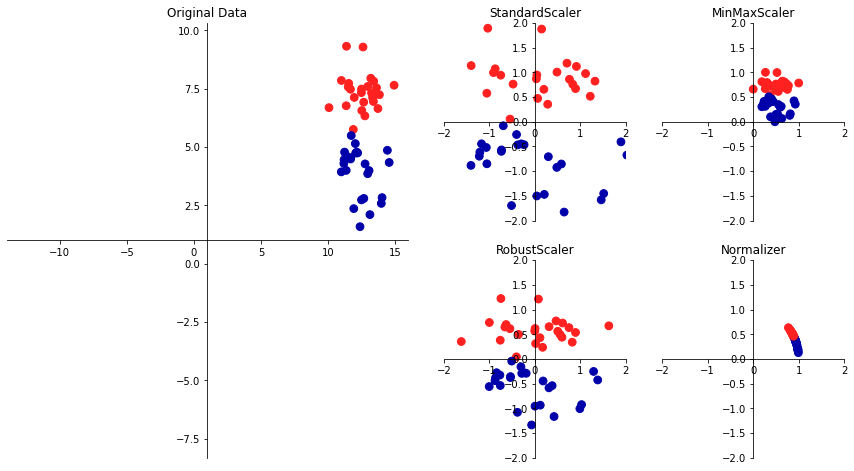

In [2]:
mglearn.plots.plot_scaling()  #예시

#### 적용하기

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)

print(cancer.data.shape)
print(X_train.shape)
print(X_test.shape)

(569, 30)
(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  # scaler 객체는 fit 할 시 X_train만 사용 

# transform 메서드 : 훈련 데이터의 스케일 조정. 새로운 데이터표현을 만들 때 사용
X_train_scaled = scaler.transform(X_train)

print(f'변환된 후 크기 :{X_train_scaled.shape}')
print(f'스케일 조정 전 특성별 최솟값:\n{X_train.min(axis=0)}')
print(f'스케일 조정 전 특성별 최댓값:\n{X_train.max(axis=0)}')
print(f'스케일 조정 후 특성별 최솟값:\n{X_train_scaled.min(axis=0)}')
print(f'스케일 조정 후 특성별 최댓값:\n{X_train_scaled.max(axis=0)}')


변환된 후 크기 :(426, 30)
스케일 조정 전 특성별 최솟값:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# 변환 된 데이터에 SVM을 적용하려면 테스트 테스도 변환해야함.
X_test_scaled = scaler.transform(X_test)
print(f'스케일 조정 후 특성별 최솟값:\n{X_test_scaled.min(axis=0)}')
print(f'스케일 조정 후 특성별 최댓값:\n{X_test_scaled.max(axis=0)}')

스케일 조정 후 특성별 최솟값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


> 스케일을 조정한 테스트 세트의 최솟값과 최댓값은 0과 1이 아님!!!!!!!!!  
    MinMaxScaler(다른 모든 스케일 모델도) 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야함.   
    transform 메서드는 테스트세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눔.

#### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

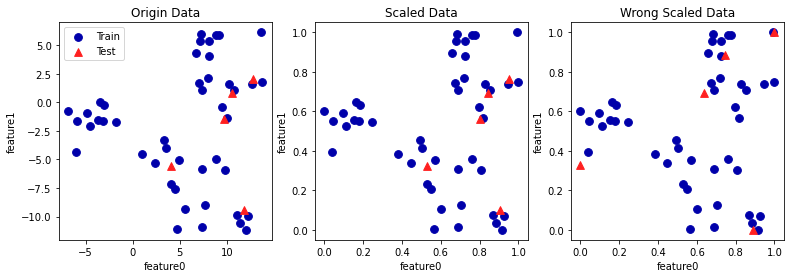

In [9]:
from sklearn.datasets import make_blobs

X,_ = make_blobs(n_samples=50,centers=5,random_state=4, cluster_std=2)
X_train,X_test = train_test_split(X,random_state=5,test_size = .1)


# 0. 훈련 세트와 테스트 세트 산점도 그림
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2.colors[0],label='Train',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2.colors[1],label='Test',s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Origin Data')

# MinMaxScaler 를 사용해 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. 스케일이 조정된 데이터의 산점도 그림
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2.colors[0],label='Train',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2.colors[1],label='Test',s=60)
axes[1].set_title('Scaled Data')


# 테스트  세트의 스케일을 따로 조정
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됨
# 절대 이렇게 사용하면 안됨
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 2. 잘못 조정된 데이터의 산점도 그림
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2.colors[0],label='Train',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',c=mglearn.cm2.colors[1],label='Test',s=60)
axes[2].set_title('Wrong Scaled Data')

for ax in axes:
    ax.set_xlabel('feature0')
    ax.set_ylabel('feature1')

> `해석`  
    첫 번째와 두 번째 그래프는 축의 눈금말고는 동일한 형태  
    세 번째 그래프는 테스트 데이터 배열이 뒤죽박죽

#### 효율적인 방법

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled = scaler.fit_transform(X_train)

### 지도학습에서 데이터 전처리 효과

In [10]:
from sklearn.svm import SVC 

X_train,X_test, y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

svm = SVC(C=100)
svm.fit(X_train,y_train)
print(f'Test Accuracy:{svm.score(X_test,y_test):.2f}')

Test Accuracy:0.94


In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

print(f'Scaled Test Data Accuracy:{svm.score(X_test_scaled,y_test):.2f}')


Scaled Test Data Accuracy:0.97


In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(f'Scaled Test Data Accuracy:{svm.score(X_test_scaled,y_test):.2f}')

Scaled Test Data Accuracy:0.96
